## Title: Kknn model to predict Raisin class using classification

## Introduction: 

Our research answers the question of whether the newly given raisin is Kecimen or Bensni based on its data/characteristics. A total of 900 raisin data were recorded, which are either Kecimen or  Besni raisins. Also, even characteristics are recorded, such as Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, Extent, and Perimeter, and we will select some of them as our predictors. The is data from Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset?fbclid=IwAR2_DGN4URi1NV-Fi0IH6P4viF1IgH9lg9TOLuNiGQ6jUD74oCW9DWAmdYs). 
We will use classification to predict the type of raisins from testing set. Since the dataset is complete, we will be using all the rows and splitting them into train/validation/test datasets. We will select the most accurate combination of predictors and number of neighbors for K-NN. In doing so, we will find the accuracy of different K nearest neighbours, the accuracy of different combinations of predictors, and the accuracy of the predictions. 

## Preliminary exploratory data analysis:

#### 1. Demonstrating that the dataset can be read from the web into R 

In [1]:
library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
raisin_data <- read_csv("https://github.com/dylankim990/DSCI100_Group_2/raw/main/data/Raisin_Dataset.csv")%>% mutate(Class = as_factor(Class))


Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Extent = col_double(),
  Perimeter = col_double(),
  Class = col_character()
)



#### 2. Clean and wrangle your data into a tidy format

a) Wrangling to tidy the data was not neccesary since they were in a tidy format. Below is the glimpse and the first 6 of the dataset. 

In [3]:
glimpse(raisin_data)
head(raisin_data)

Rows: 900
Columns: 8
$ Area            <dbl> 87524, 75166, 90856, 45928, 79408, 49242, 42492, 6095…
$ MajorAxisLength <dbl> 442.2460, 406.6907, 442.2670, 286.5406, 352.1908, 318…
$ MinorAxisLength <dbl> 253.2912, 243.0324, 266.3283, 208.7600, 290.8275, 200…
$ Eccentricity    <dbl> 0.8197384, 0.8018052, 0.7983536, 0.6849892, 0.5640113…
$ ConvexArea      <dbl> 90546, 78789, 93717, 47336, 81463, 51368, 43904, 6232…
$ Extent          <dbl> 0.7586506, 0.6841296, 0.6376128, 0.6995994, 0.7927719…
$ Perimeter       <dbl> 1184.040, 1121.786, 1208.575, 844.162, 1073.251, 881.…
$ Class           <fct> Kecimen, Kecimen, Kecimen, Kecimen, Kecimen, Kecimen,…


Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


#### 3. Summarizing the data in at least one table

a) The below tibble shows that there are exactly 450 Besni raisins and 450 Kecimens. This finding is helpful since we do not have to worry about the proportion of the data being unbalanced.

In [4]:
#splitting data for future uses
set.seed(5805)
raisin_split <- initial_split(raisin_data, prop = 0.75 ,strata = Class)
raisin_training <- training(raisin_split)
raisin_testing <- testing(raisin_split)

# the number of observations in each class
obs_num_class <- raisin_training %>%
    group_by(Class) %>%
    summarize(num_obs = n())

obs_num_class

`summarise()` ungrouping output (override with `.groups` argument)



Class,num_obs
<fct>,<int>
Kecimen,338
Besni,338


b) The below tibble shows the means of the predictor variables.

In [5]:
# the means of the predictor variables you plan to use in your analysis
means_predictors <- raisin_training %>%
    select(-Class) %>%
    map_df(mean)

means_predictors    

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87459.48,429.9117,253.8028,0.7803553,90740.31,0.6995293,1162.212


c) The below tibble shows that there are no NA data. This is a complete data set.

In [6]:
#c) counting how many rows have missing data. 
num_of_na <- colSums(is.na(raisin_training))

num_of_na

Area MajorAxisLength MinorAxisLength    Eccentricity      ConvexArea 
              0               0               0               0               0 
         Extent       Perimeter           Class 
              0               0               0

#### 4. Visualizing the data with at least one plot relevant to the analysis

a) The below tables show comparisons of the two types. Comparing their area, perimeter, major axies length, and minor axis length shows that Besni Raisons are bigger than Kecimen raisins based on the visualized characteristics.

In [7]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




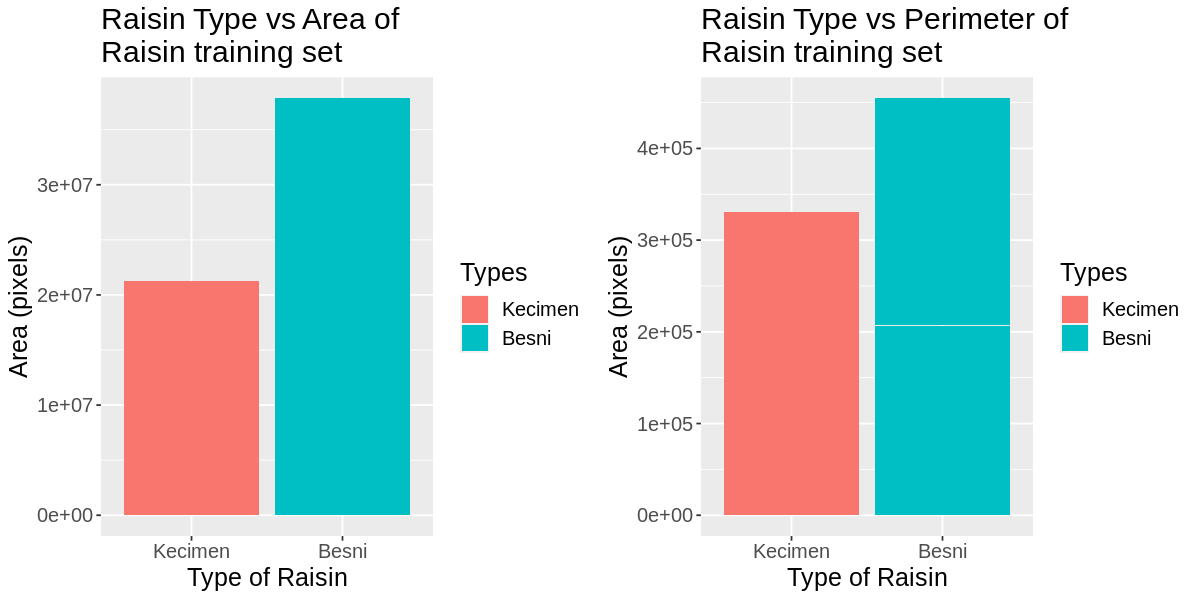

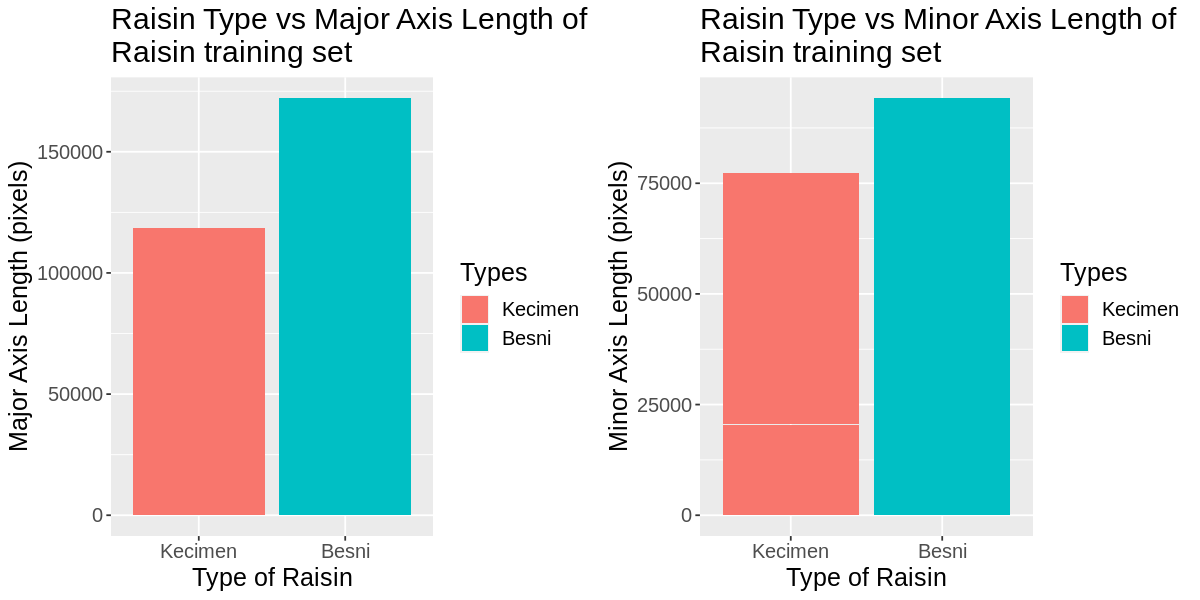

In [8]:
#a) comparing the distributions of each of the predictor variables
options(repr.plot.width = 10, repr.plot.height = 5) 

class_vs_area <- ggplot(raisin_training, aes(x = Class, y = Area, fill = Class)) +
    geom_bar(stat = "identity") +
    labs(x = "Type of Raisin", y = "Area (pixels)", fill = "Types") +
    theme(text = element_text(size = 15)) +
    ggtitle("Raisin Type vs Area of 
Raisin training set")
class_vs_perimeter <- ggplot(raisin_training, aes(x = Class, y = Perimeter, fill = Class)) +
    geom_bar(stat = "identity") +
    labs(x = "Type of Raisin", y = "Area (pixels)", fill = "Types") +
    theme(text = element_text(size = 15)) +
    ggtitle("Raisin Type vs Perimeter of 
Raisin training set")

class_vs_majoraxislength <- ggplot(raisin_training, aes(x = Class, y = MajorAxisLength, fill = Class)) +
    geom_bar(stat = "identity") +
    labs(x = "Type of Raisin", y = "Major Axis Length (pixels)", fill = "Types") +
    theme(text = element_text(size = 15)) +
    ggtitle("Raisin Type vs Major Axis Length of 
Raisin training set")
class_vs_minoraxislength <- ggplot(raisin_training, aes(x = Class, y = MinorAxisLength, fill = Class)) +
    geom_bar(stat = "identity") +
    labs(x = "Type of Raisin", y = "Minor Axis Length (pixels)", fill = "Types") +
    theme(text = element_text(size = 15)) +
    ggtitle("Raisin Type vs Minor Axis Length of 
Raisin training set")

grid.arrange(class_vs_area, class_vs_perimeter, ncol=2)
grid.arrange(class_vs_majoraxislength, class_vs_minoraxislength, ncol=2)

## Methods:

#### 1. Process of data analysis

The process of Raisin data analysis uses classification to predict if the test data are either Kecimen or Besni raisin. We will divide the dataset into training and testing set. To choose K, the training set will be further divded into subtraining and validation sets to do 5-fold cross-validation considering the moderate size of the data set. After the vfold_cv with v = 5 in the tune_grid of its workflow, we will collect_metrics to get accuracies's mean and standard error of the classifier. Then, we will graph and also arrange the number of neighbors and accuracy estimates to find most reliable and accurate K. Process for predictor selection is written below.

<!-- Below is the codes. It shows that neighbor as 3 shows highest accuracy.  -->

#### 2. Variables/columns to use 

This project will be using forward selection method to find the accuracy rates for different combinations of predictors and visualized them. Since our selection of predictors is a part of tuning my classifier, this project have used training dataset only for the process. There are two forloops. First one increased the predictor set sizes and the second one selected which predictor to add, by checking which one gives the best accuracy rate. For each set of predictors,  the loop created a recipe, with scaling, and inserted into a workflow to tune the K-NN classifier using 5-fold cross-validation. 

Below is the codes. It shows that the combination of Perimeter, Area, MajorAxisLength, ConvexArea, Eccentricity shows highest accuracy.

In [9]:
set.seed(5805)
raisin_split <- initial_split(raisin_data, prop = 0.75 ,strata = Class)
raisin_training <- training(raisin_split)
raisin_testing <- testing(raisin_split)

raisin_subset <- raisin_training %>%
  select(Area,
         MajorAxisLength, 
         MinorAxisLength, 
         Eccentricity, 
         ConvexArea, 
         Extent, 
         Perimeter, 
         Class)

names <- colnames(select(raisin_subset, -Class))

In [10]:
# creating an empty tibble which will store the accuracy results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

In [11]:
# create a model 
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

In [12]:
set.seed(5805)
# 5-fold cross-validation
raisin_vfold <- vfold_cv(raisin_subset, v = 5, strata = Class)

# total # of predictors
n_total <- length(names)

# creating to store selected predictors
selected <- c()

In [13]:
set.seed(5805)
#loops to try all the models
# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()

#inner loop for model string for different combinations of predictors
    for (j in 1:length(names)) {
        # create a model string for the combinations of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))
        
# created a recipe from the model string
        raisin_recipe <- recipe(as.formula(model_string), 
                                data = raisin_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())
        
# tune the KNN classifier with these predictors, 
# and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(raisin_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = raisin_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

# adding the result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
        accuracies <- accuracies %>% 
          add_row(size = i, 
                  model_string = models[[jstar]], 
                  accuracy = accs[[jstar]])
        selected <- c(selected, names[[jstar]])
        names <- names[-jstar]
}

accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Class ~ Perimeter,0.8507902
2,Class ~ Perimeter+Area,0.8597015
3,Class ~ Perimeter+Area+MajorAxisLength,0.8611501
4,Class ~ Perimeter+Area+MajorAxisLength+ConvexArea,0.8611282
5,Class ~ Perimeter+Area+MajorAxisLength+ConvexArea+Eccentricity,0.8654741
6,Class ~ Perimeter+Area+MajorAxisLength+ConvexArea+Eccentricity+Extent,0.8640474
7,Class ~ Perimeter+Area+MajorAxisLength+ConvexArea+Eccentricity+Extent+MinorAxisLength,0.8581870


#### 3. Describing at least one way to visualize the results

We can visualize the accuracy of predictors and number of neighbors to find more valid and reliable predictors and number of neighbors to use to predict the test set.
Below is an example of how we can visualize how estimated accuracy changes as number of predictors changes to find the best predictors combination to use. It shows that 5 number of predictors, which is Perimeter, Area, MajorAxisLength, ConvexArea, Eccentricity provides the greatest amount of accuracy at approximately 86.5% after validating the training data with the test data using folds. 

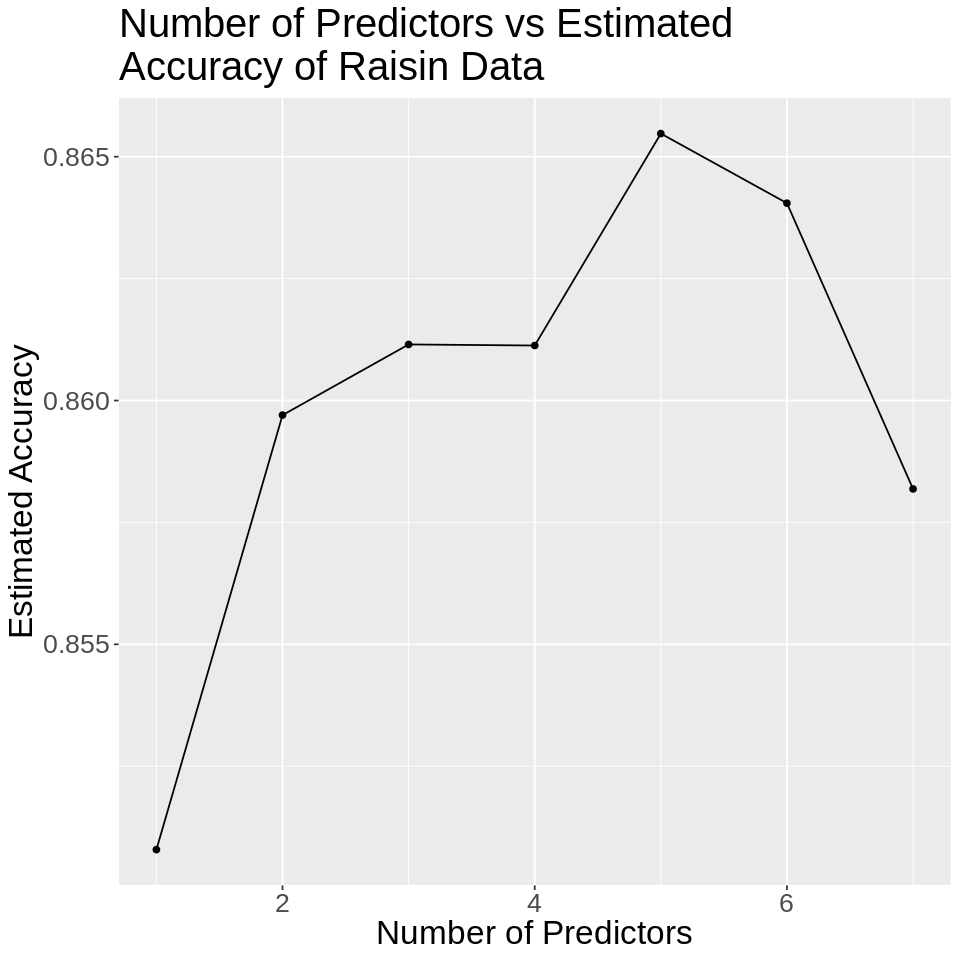

In [15]:
options(repr.plot.width = 8, repr.plot.height = 8)

accuracies_plot <- ggplot(accuracies, aes(x = size, y = accuracy)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Predictors", y = "Estimated Accuracy", title = "Number of Predictors vs Estimated 
Accuracy of Raisin Data") +
    theme(text = element_text(size = 20))

accuracies_plot

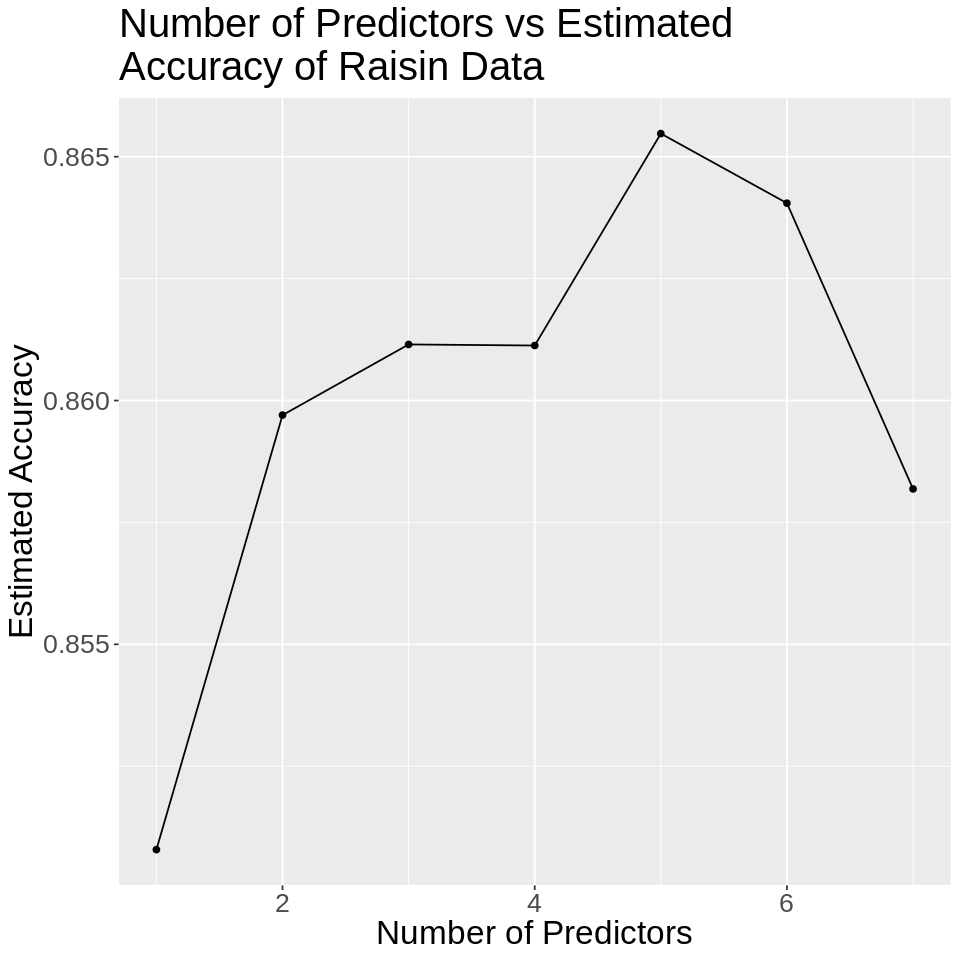

In [17]:
accuracies_plot